<a href="https://colab.research.google.com/github/Mikes017/proyectofinalSiafi/blob/main/proyectofinal_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primero cargue el data set

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
# la codificacion al parecer estaba en latin1 por lo que daba error

import kagglehub

#Importando el dataset
path = kagglehub.dataset_download("nelgiriyewithana/top-spotify-songs-2023")
df=pd.read_csv(f"{path}/spotify-2023.csv",encoding="latin1")
print(df.head())


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

MSE: 8.20134179693118e+16
R^2: 0.6649680234073193


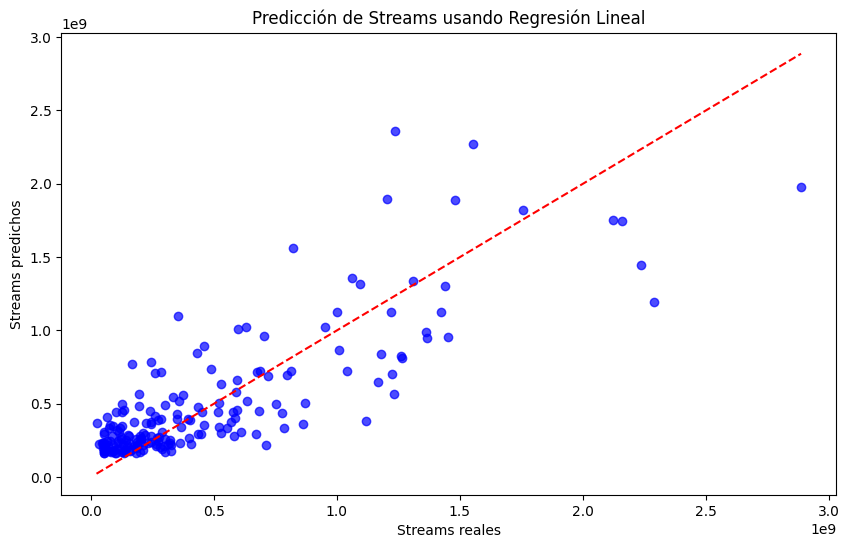

In [ ]:
# Limpieza de datos
# Convertir 'streams' a numérico
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Eliminar duplicados y manejar nulos
essential_columns = ['streams', 'in_spotify_playlists', 'in_apple_playlists']
df_cleaned = df.drop_duplicates().dropna(subset=essential_columns)

# Seleccionar las variables relevantes
X = df_cleaned[['in_spotify_playlists', 'in_apple_playlists']]
y = df_cleaned['streams']

# Normalizar las variables predictoras
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Streams reales")
plt.ylabel("Streams predichos")
plt.title("Predicción de Streams usando Regresión Lineal")
plt.show()



El MSE se fue de sabatico, esto podria deberse a que al calcular un error en streams teniendo en cuenta que pueden ser millones de escuchas, en cambio la R2 es de 0.66 y si bien no es 1 tampoco es tan bajo para ser tantos datos, probe anteriormente con otras metricas y me daban valores de 0.1 o menos, asi que escogiendo las playlists como parametro me doy por bien servido